In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/opt/spark-3.0.0-bin-hadoop2.7"

In [2]:
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[7]").getOrCreate()
sc=spark.sparkContext

In [4]:
from pyspark.ml.clustering import KMeans, KMeansModel
from pyspark.ml.evaluation import ClusteringEvaluator

import numpy as np

In [13]:
rdd_base = sc.textFile('../Base/BD_300.csv').map(lambda s: s.split(','))
rdd_aux = rdd_base.map(lambda element: element[2])
rdd_etiq = rdd_aux.zipWithIndex().filter(lambda s: s[1]>0).map(lambda s: s[0])

In [26]:
rdd_etiq.coalesce(1).saveAsTextFile('../resultados/300_com/indices')

In [6]:
#En esta celda se agrega el índice para dar el formato al archivo que requiere el clúster.
rdd = (sc.textFile('../resultados/300_com//cluster.txt'))
rdd_final = rdd.zipWithIndex().map(lambda element: (element[1], element[0]))
#rdd_final.coalesce(1).saveAsTextFile("../resultados/100_com/arch_cluster")

**PRUEBA**

In [27]:
#df = spark.read.format("libsvm").option("numFeatures", "780").load("/opt/spark-3.0.0-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt")
df = spark.read.format("libsvm").load("../resultados/300_com/cluster2.txt")

In [28]:
df.show(5)
df.printSchema()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(2236,[0,1,8,45,1...|
|  2.0|(2236,[0,2,3,5,7,...|
|  2.0|(2236,[130,1405],...|
|  2.0|(2236,[2,5,10,19,...|
|  0.0|(2236,[0,1,2,5,16...|
+-----+--------------------+
only showing top 5 rows

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [29]:
df.describe().show()

+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|               300|
|   mean|1.0766666666666667|
| stddev|0.9093285895840986|
|    min|               0.0|
|    max|               2.0|
+-------+------------------+



**Clustering**

In [30]:
# Loads data.
#dataset = spark.read.format("libsvm").load('/opt/spark-3.0.0-bin-hadoop2.7/data/mllib/sample_libsvm_data.txt')
dataset = spark.read.format("libsvm").load('../resultados/300_com/cluster2.txt')

In [31]:
# Trains a k-means model.
kmeans = KMeans().setK(3).setSeed(1)
model = kmeans.fit(dataset)

In [32]:
# Make predictions
predictions = model.transform(dataset)

In [33]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.04059241322151253


In [34]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[2.35294118 1.5        1.09803922 ... 0.         0.00980392 0.00980392]
[0.56345178 0.40101523 0.30456853 ... 0.00507614 0.         0.        ]
[1. 1. 0. ... 0. 0. 0.]


In [35]:
files="../resultados/300_com/centroides.txt"

for center in centers:
    file=open(str(files),'a+')
    file.write('\n')
    for i in range(len(center)):
        file.write(str(center[i]) +' ')

    file.close()

**MATPLOTLIB**

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

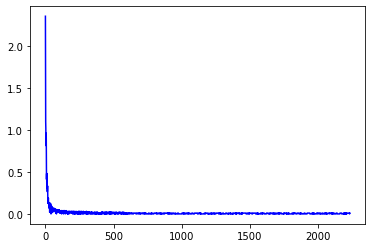

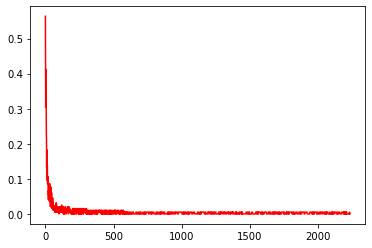

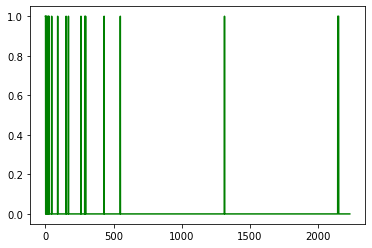

In [37]:
plt.plot(centers[0][:], color='blue')
plt.show()
plt.plot(centers[1][:], color='red')
plt.show()
plt.plot(centers[2][:], color='green')
plt.show()

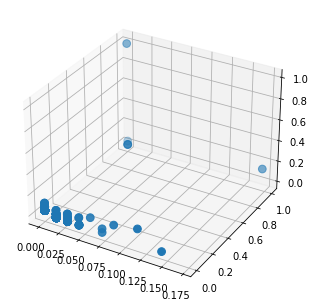

In [153]:
colores=['red','green','blue']
asignar=[]
for row in range(3):
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centers[0], centers[1], centers[2], asignar, s=60)